# IMPORTING THE NECESSARY LIBRARIES:

In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

# SET ALL THE CONSTANTS:

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3

# IMPORT DATA INTO TENSORFLOW DATASET OBJECT

In [3]:
df=tf.keras.preprocessing.image_dataset_from_directory("PlantVillage",shuffle=True,image_size=(256,256),batch_size=32)

Found 2152 files belonging to 3 classes.


In [4]:
class_names=df.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(df)

68

In [6]:
for image_batch, labels_batch in df.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 2 2 0 0 0 1 1 1 1 0 1]


# Visualize some of the images from our dataset:

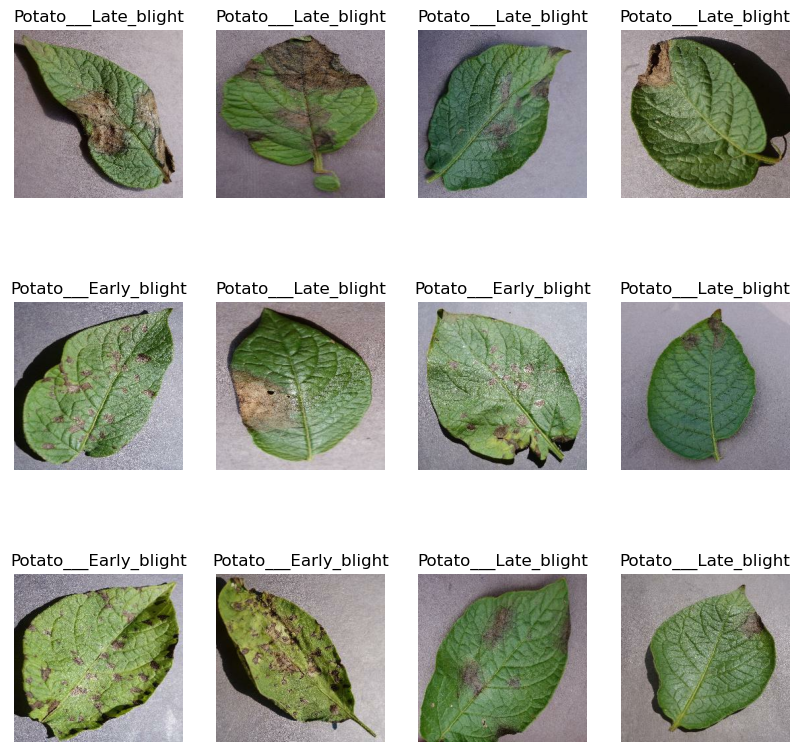

In [7]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in df.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

# FUNCTION TO SPLIT DATASET INTO TRAINING,TESTING,VALIDATION:

In [8]:
len(df)

68

In [9]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [10]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(df)

In [11]:
len(train_ds)

54

In [12]:
len(val_ds)

6

In [13]:
len(test_ds)

8

# CREATING A LAYER FOR RESIZING AND NORMALIZTION:

In [14]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(256, 256),
  layers.experimental.preprocessing.Rescaling(1/255),
])

# WE ARE GOING TO USE CONVOLUTION NEURAL NETWORK (CNN) HERE. CNN IS POPULAR FOR IMAGE CLASSIFICATION TASKS:

In [15]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

# COMPILING THE MODEL:

We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [18]:
history = model.fit(train_ds,batch_size=BATCH_SIZE,validation_data=val_ds,verbose=1,epochs=10)

Epoch 1/10
54/54 [==============================] - 122s 2s/step - loss: 0.8906 - accuracy: 0.5282 - val_loss: 0.7673 - val_accuracy: 0.6719
Epoch 2/10
54/54 [==============================] - 304s 6s/step - loss: 0.5166 - accuracy: 0.7846 - val_loss: 0.5628 - val_accuracy: 0.7202
Epoch 3/10
54/54 [==============================] - 152s 3s/step - loss: 0.3338 - accuracy: 0.8675 - val_loss: 0.3182 - val_accuracy: 0.8750
Epoch 4/10
54/54 [==============================] - 146s 3s/step - loss: 0.2663 - accuracy: 0.8938 - val_loss: 0.1303 - val_accuracy: 0.9531
Epoch 5/10
54/54 [==============================] - 127s 2s/step - loss: 0.1686 - accuracy: 0.9360 - val_loss: 0.1248 - val_accuracy: 0.9531
Epoch 6/10
54/54 [==============================] - 131s 2s/step - loss: 0.1550 - accuracy: 0.9454 - val_loss: 0.2143 - val_accuracy: 0.9010
Epoch 7/10
54/54 [==============================] - 136s 2s/step - loss: 0.1428 - accuracy: 0.9425 - val_loss: 0.0801 - val_accuracy: 0.9635
Epoch 8/10
54

# TESTING THE MODEL:

In [19]:
# You can see that we get 100.00% accuracy for our test dataset.
score=model.evaluate(test_ds)

8/8 [==============================] - 9s 726ms/step - loss: 0.1073 - accuracy: 0.9531


Score is just a list containing loss and accuracy value

In [20]:
score

[0.10734353959560394, 0.953125]

# PLOTTIG THE ACCURACY AND LOSS CURVES:

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

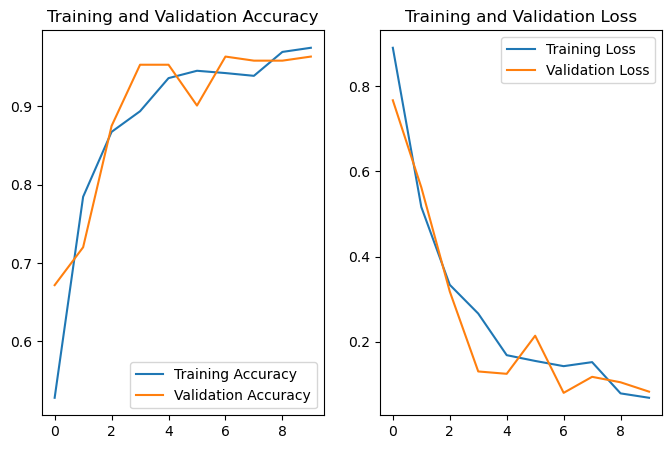

In [27]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
EPOCHS = 10
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# RUN PREDICTION ON A SAMPLE IMAGE:

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 2s 2s/step
predicted label: Potato___Late_blight


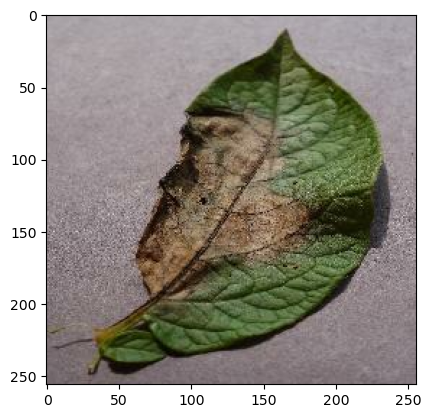

In [24]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])